<a href="https://colab.research.google.com/github/martinnv6/Data-Science-Master/blob/main/Classification%20and%20Data%20Processing/Tarea1/Airbnb_Preprocesamiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01/26/2023 Como primer tarea se nos pidio anteriormente un documento powerpoint con la descripcion del proyecto final y los objetivos que buscamos, ahora se realizara un preprocesamiento a los datos elegidos.

In [1]:
#Importamos las librerias basicas y necesarias
import pandas as pd #Libreria de manipulacion de datos
import numpy as np #Libreria numerica muy potente
import matplotlib.pyplot as plt #Libreria para graficos
import seaborn as sns #Libreria para graficos basada en Matplotlib (es mas simple)

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [8]:
# df_airbnb = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv") 
#La funcion read_ tiene muchas opciones dependiendo el tipo de dato que se vaya a cargar
df_airbnb=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tetramestre 4/Procesamiento y clasificacion de datos/Tarea 1/AB_NYC_2019.csv')


In [9]:
df_airbnb.head(6) #Vemos los primeros 6 datos para ver que se cargaron correctamente


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [10]:
df_airbnb.shape #Esto nos brinda las dimensiones de los datos ("filas","columnas")


(48895, 16)

In [11]:
df_airbnb[48889:-1] #Esta es otra forma de filtrar una porcion del dataset
#esto se interpreta [desde:hasta], el -1 se utiliza para indicar el ultimo valor

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [12]:
df_airbnb.columns #Vemos los features (asi vamos a llamar a las columnas) que tiene nuestro dataset

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
print("cantidad de barrios:", len(df_airbnb["neighbourhood_group"].unique())) 
#len brinda la longitud de un array
#unique() brinda los valores sin repetir 
#df["host_id"] metodo de filtrado por features

cantidad de barrios: 5


In [14]:
df_airbnb[["minimum_nights","price","availability_365"]].describe()
#Brinda los estadisticos basicos de las columnas seleccionadas

,minimum_nights,price,availability_365
count,48895.000000,48895.000000,48895.000000
mean,7.029962,152.720687,112.781327
std,20.510550,240.154170,131.622289
min,1.000000,0.000000,0.000000
25%,1.000000,69.000000,0.000000
50%,3.000000,106.000000,45.000000
75%,5.000000,175.000000,227.000000
max,1250.000000,10000.000000,365.000000


In [15]:
df_filter = df_airbnb[df_airbnb["price"]<df_airbnb["price"].mean()]
#Esta es otra forma de filtrar datos por condiciones
#En este caso filtramos por precio, los alquileres que esten por debajo de la media

In [16]:
df_filter["price"].max() #Vemos si se aplico el filtro, visualizamos el valor maximo del precio


152

In [17]:
df_airbnb["price"].mean() #Validamos y vemos que filtro correctamente los datos por la media


152.7206871868289

In [18]:
df_airbnb.isna().sum() #De esta forma vemos el total de valores NaN en nuestro dataset
#Si no se utiliza el sum() va a devolver la condicion True o False de los campos

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Vemos que las columnas relacionadas a las fechas de los comentarios y las cantidades de comentarios por mes tienen algunos NaN, estas columnas no son representativas para nuestro analisis en este momento, asique vamos a eliminarlas.

En caso de que nos encontremos con features que si nos serian útiles, podemos utilizar alguna estrategia para reemplazarlos,

df_airbnb["last_review"].fillna(inplace = True)
Hay muchas otras estrategias para tratar con valores NaN, les recomiendo ir googleandolas a medida que se vayan encontrando con los distintos problemas.

Veamos nivel porcentual que tantos nan ocupan nuestro dataset, al ser bajo podemos prescindir de ellos



In [19]:
df_airbnb.isna().sum()/df_airbnb.shape[0]*100


id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [20]:
#Aprovechamos a eliminar otras columnas que no seran necesarias
df_airbnb.drop(['name','id','host_name','last_review','reviews_per_month','calculated_host_listings_count'], axis=1, inplace=True)
#cuando vean en la mayoria de las funciones AXIS es = 1 (columna), 0 (fila)

Si solo queremos eliminar los valores NaN y quedarnos con los demas datos debiamos utilizar lo siguiente

df_airbnb.dropna(axis=0, how='any', subset=['name', 'host_name'], inplace=True)
Si necesitamos eliminar duplicados

df_airbnb.drop_duplicates(inplace = True)

In [21]:
#Agrupamos por "neighbourhood_group" y mostramos el precio mas alto por barrio
df_airbnb.groupby(['neighbourhood_group'])[["price"]].max()

,price
neighbourhood_group,
Bronx,2500
Brooklyn,10000
Manhattan,10000
Queens,10000
Staten Island,5000


# Visualizacion

In [22]:
df_airbnb.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

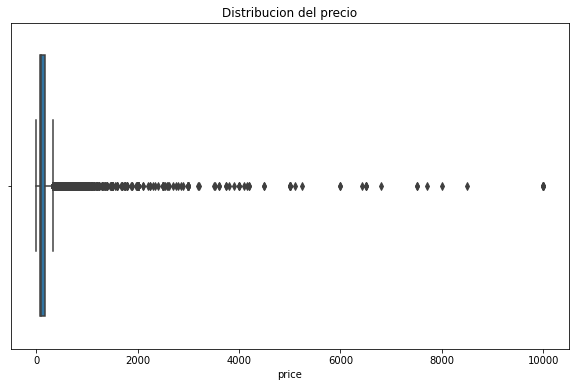

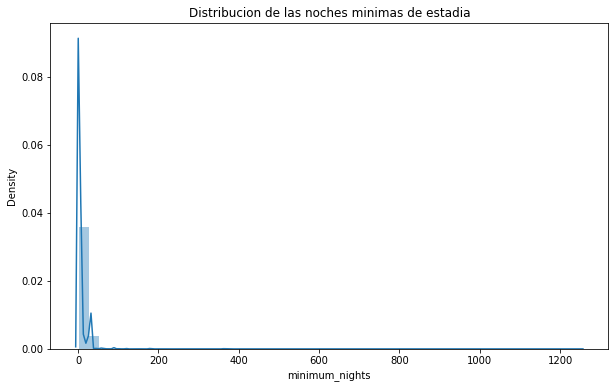

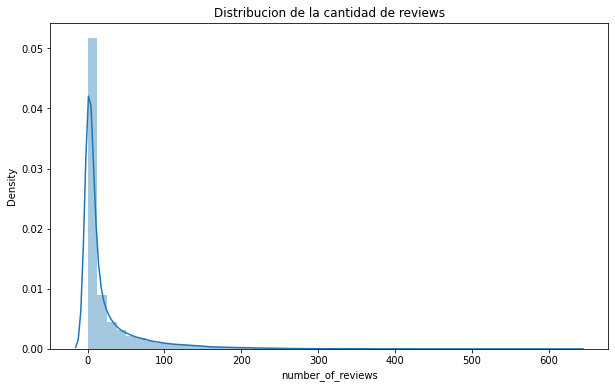

In [23]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_airbnb["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_airbnb["minimum_nights"])

plt.figure(3, figsize=(10,6))
plt.title("Distribucion de la cantidad de reviews")
sns.distplot(df_airbnb["number_of_reviews"])

Con estos primeros gráficos ya podemos ver que tenemos outliers, valores atípicos

Vemos en el primer grafico de precios que el valor máximo es de USD 10.000 la noche, es un valor que tiene poco sentido en nuestro análisis, asique tenemos que ver como lo tratamos.
En el segundo grafico vemos que también tenemos valores extraños, la estadía mínima de 1250 dias, el dueño pide que el alquiler sea de alrededor de 3 años como mínimo... en tal caso no aplica para la plataforma de airbnb, deberíamos hacer algo con esos datos.
En la ultima vemos que la mayoria de los datos estan en 0, esto puede deberse a que muchos clientes que alquilan no deja ningun comentarios, son valores que tienen alguna explicación lógica

# Limpiando outliers

In [24]:
#Quitando valores extremos en el precio
p10 = np.percentile(df_airbnb["price"], 10)
p90 = np.percentile(df_airbnb["price"], 90)
df_airbnb = df_airbnb[(df_airbnb["price"] >= p10) & (df_airbnb["price"] <= p90)]

In [25]:
#Quitando valores extremos en la cantidad de noches minimas
p10 = np.percentile(df_airbnb["minimum_nights"], 10)
p90 = np.percentile(df_airbnb["minimum_nights"], 90)
df_airbnb = df_airbnb[(df_airbnb["minimum_nights"] >= p10) & (df_airbnb["minimum_nights"] <= p90)]

Regraficamos


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


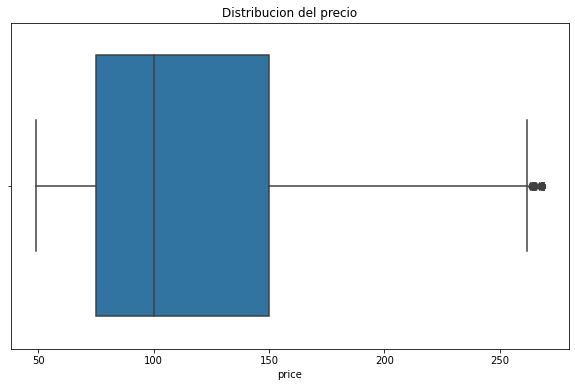

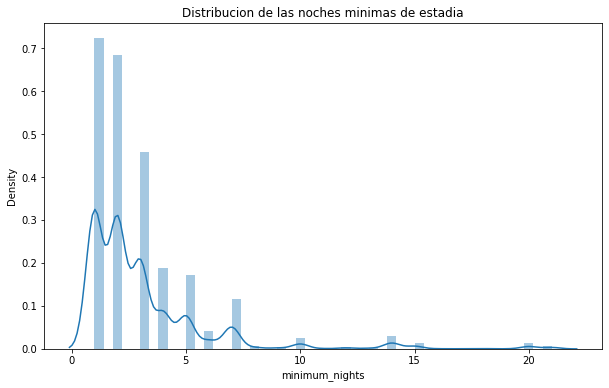

In [26]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_airbnb["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_airbnb["minimum_nights"])

Vemos que ahora se ve un poco mejor la distribución de nuestros datos

# Analisis

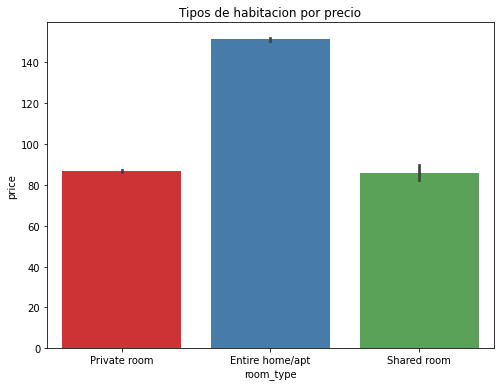

In [27]:
plt.figure(figsize=(8,6))
plt.title("Tipos de habitacion por precio")
sns.barplot(y='price',x='room_type',data=df_airbnb, palette="Set1")
plt.show()

Vemos que alquilar una habitación privada y una compartida tienen un precio similar y alquilar la casa completa nos puede salir casi el doble

Vamos a ver que barrios tenemos en New York

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


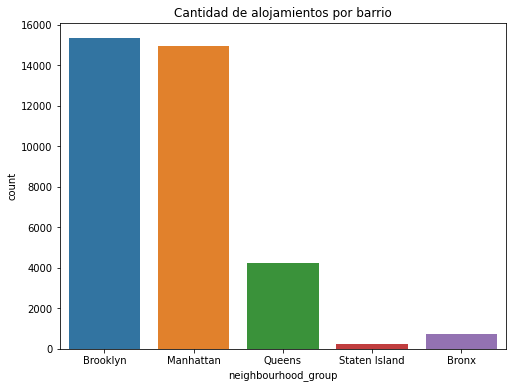

In [28]:
plt.figure(figsize=(8,6))
plt.title("Cantidad de alojamientos por barrio")
sns.countplot(df_airbnb['neighbourhood_group'])

¿A que barrio tenemos que ir si queremos alquilar una casa completa al menor precio?

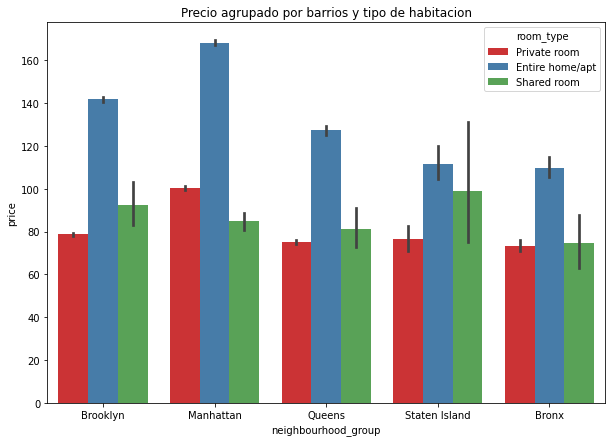

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y="price", hue = "room_type",data = df_airbnb, palette="Set1")
plt.title("Precio agrupado por barrios y tipo de habitacion")
plt.show()

Bronx es el barrio con precios mas bajos

En este dataset tenemos las columnas latitude y longitude, esto nos indica que podemos graficar las coordenadas de los alojamientos y barrios que tenemos.

Tomemos estos datos y grafiquemoslos divididos por barrio

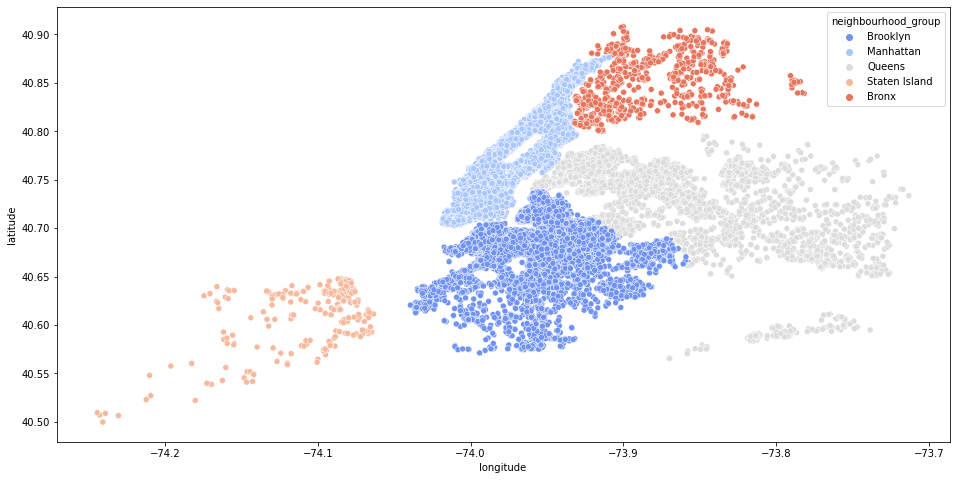

In [30]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_airbnb["latitude"],x=df_airbnb["longitude"],hue=df_airbnb["neighbourhood_group"],palette="coolwarm")
plt.show()

Si buscamos una foto del mapa de New York vemos que se asemeja a la forma de esta ciudad

Se puede realizar una gran cantidad de gráficos de todo tipo y con otro tipo de librerías, solo queda ponerse a googlear. Esto es solo un acercamiento a lo utilizado de forma básica.

Pasemos a la próxima etapa

# Feature Engineering

Vemos que en nuestro dataset tenemos conjuntos de datos categóricos como los barrios y tipos de habitación, lo que podemos hacer es transformar cada categoría a una columna y completar los campos con 1 en caso de que el alojamiento sea en ese barrio y un 0 en caso de que no lo sea.

In [31]:
#Vamos a trabajar solo con las columnas categoricas
df_airbnb_cat = df_airbnb[["neighbourhood_group","neighbourhood","room_type"]]
df_airbnb_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
